# Handwritten Digit Recognition with MNIST Dataset and Interactive Drawing Pad

This notebook demonstrates a complete workflow for building a handwritten digit recognition system using the MNIST dataset. 

We first load and preprocess the MNIST dataset, which consists of 70,000 grayscale images of handwritten digits (0-9) sized 28x28 pixels. Then, we build and train a convolutional neural network (CNN) to classify these digits with high accuracy.

After training, the notebook includes an interactive drawing pad that allows users to draw their own digits directly inside the notebook. The drawn images are preprocessed to match the MNIST format and fed into the trained CNN model to predict the digit. This provides an intuitive way to test the model on custom handwritten input and visualize its performance beyond the standard dataset.

This project highlights the application of deep learning for image classification, interactive user input handling in Jupyter notebooks, and image preprocessing techniques.


In [1]:
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import numpy as np
import matplotlib.pyplot as plt
from ipycanvas import Canvas
from IPython.display import display
from ipywidgets import Button, HBox, Output
from PIL import Image


In [2]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0,1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images for CNN input (add channel dimension)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")


Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


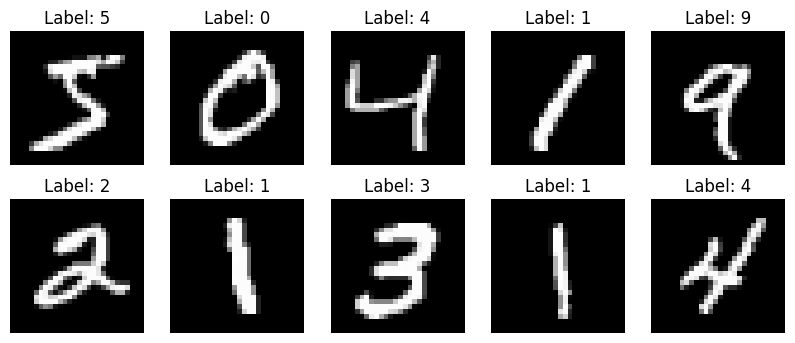

In [3]:
# Visualize sample digits
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()


In [4]:
# Build CNN model
model = models.Sequential([
    Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [5]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
# Train model
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8793 - loss: 0.3811 - val_accuracy: 0.9787 - val_loss: 0.0722
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9824 - loss: 0.0554 - val_accuracy: 0.9872 - val_loss: 0.0428
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9885 - loss: 0.0353 - val_accuracy: 0.9850 - val_loss: 0.0460
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9923 - loss: 0.0248 - val_accuracy: 0.9893 - val_loss: 0.0336
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9936 - loss: 0.0195 - val_accuracy: 0.9865 - val_loss: 0.0460


In [7]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9825 - loss: 0.0490
Test accuracy: 0.9863


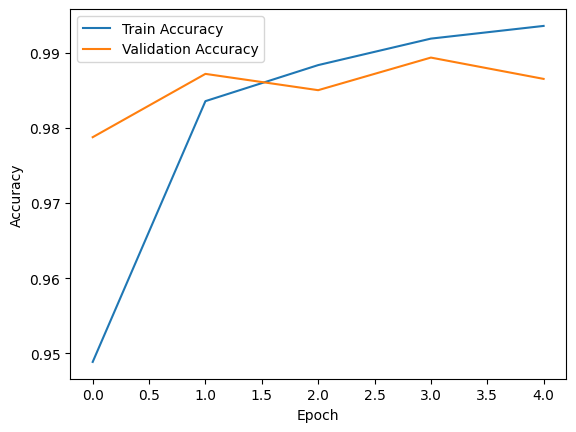

In [8]:
# Visualize training progress
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [9]:
drawing = False  # True if mouse is pressed
ix, iy = -1, -1
canvas = np.zeros((280, 280), dtype=np.uint8)

# Mouse callback function
def draw_digit(event, x, y, flags, param):
    global drawing, ix, iy, canvas

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.line(canvas, (ix, iy), (x, y), 255, 15)
            ix, iy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.line(canvas, (ix, iy), (x, y), 255, 15)

# Create OpenCV window
cv2.namedWindow("Draw a Digit (Press P to Predict, C to Clear, ESC to Exit)")
cv2.setMouseCallback("Draw a Digit (Press P to Predict, C to Clear, ESC to Exit)", draw_digit)

while True:
    cv2.imshow("Draw a Digit (Press P to Predict, C to Clear, ESC to Exit)", canvas)
    key = cv2.waitKey(1) & 0xFF

    if key == ord('p'):
        img = cv2.resize(canvas, (28, 28))
        img = img / 255.0
        img = img.reshape(1, 28, 28, 1)
        pred = model.predict(img)
        digit = np.argmax(pred)
        print(f"Predicted Digit: {digit}")

    elif key == ord('c'):
        canvas[:] = 0  # Clear the canvas

    elif key == 27:  # ESC key
        break

cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Digit: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Digit: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Digit: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Digit: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Digit: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Digit: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Digit: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Digit: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24m